In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

# 1.Read Data File

In [3]:
dataframe = pd.read_csv("Data File/final_model_data.csv")
dataframe = dataframe.rename(columns={'mandeath':'target'})
dataframe = dataframe.drop('Unnamed: 0',axis=1)
dataframe = dataframe.drop('index',axis=1)
y = dataframe['target']
X=dataframe.drop('target',axis=1)
X=X.drop('IX',axis=1)
X=X.drop('X',axis=1)
X=X.drop('XIX',axis=1)
X=X.drop('XX',axis=1)

# 2. Split Data File

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 3. Training

## 3.1 Decision Tree


In [4]:
DecisionTree = tree.DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)
y_pred = DecisionTree.predict(X_test)
DecisionTree.score(X_test, y_test, sample_weight=None)

0.8618123070709401

Text(47.24999999999999, 0.5, 'Actual Value')

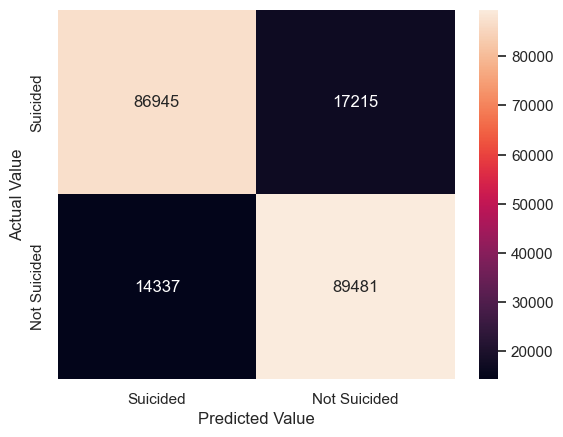

In [7]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86    104160
         1.0       0.87      0.86      0.86    103818

    accuracy                           0.86    207978
   macro avg       0.86      0.86      0.86    207978
weighted avg       0.86      0.86      0.86    207978



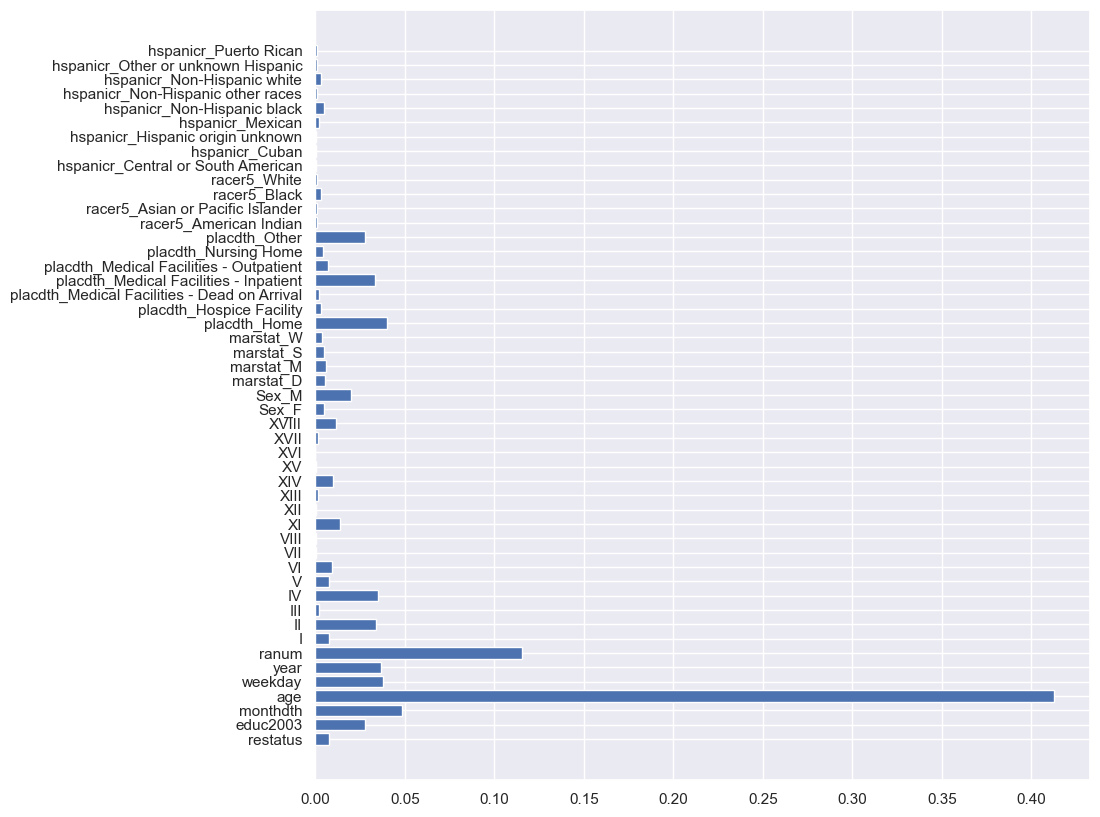

In [17]:
vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = DecisionTree.feature_importances_
plt.figure(figsize=(10,10))
plt.barh([x for x in feature_names], importance)
plt.show()

## 3.2 Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',random_state=16)


# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test, sample_weight=None)

/Users/timmy/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.848291646231813

Text(47.24999999999999, 0.5, 'Actual Value')

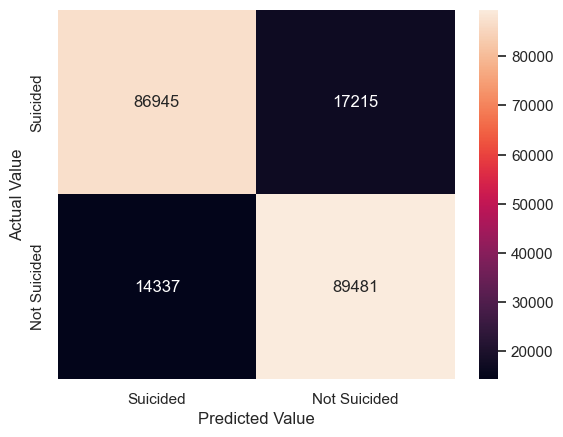

In [11]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

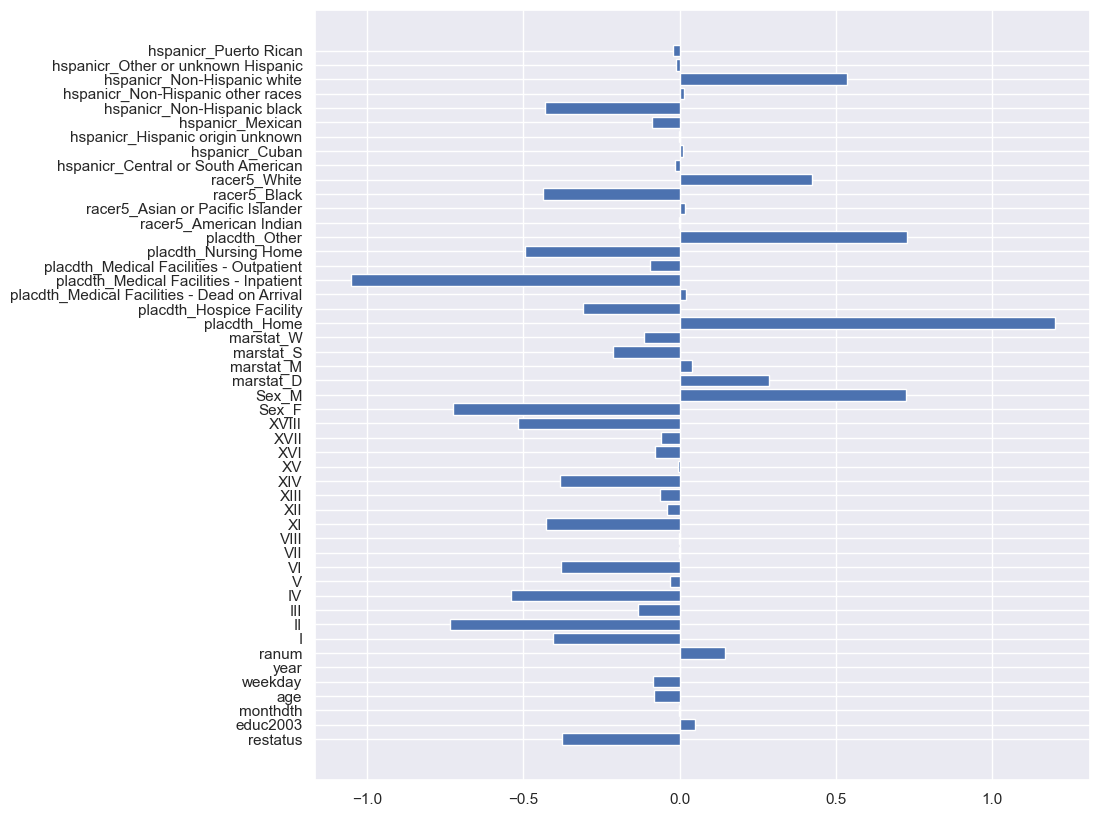

In [12]:
vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = logreg.coef_[0]
importance = vector(importance)
plt.figure(figsize=(10,10))
plt.barh([x for x in feature_names], importance)
plt.show()

## 3.3 KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2,n_jobs=-1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.8092346305859274

Text(47.24999999999999, 0.5, 'Actual Value')

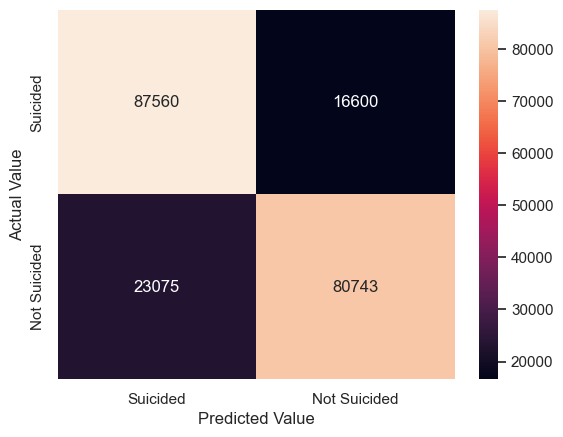

In [9]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = knn.get_params()
#plt.bar([x for x in feature_names], importance)
#plt.xticks(rotation=90)
#plt.show()
importance

## 3.4 SVC

In [5]:
from sklearn.svm import SVC  
clf = SVC(kernel='rbf') 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [ ]:
vector = np.vectorize(np.float_)
feature_names = X_train.columns.tolist()
importance = clf.coef_[0]
importance = vector(importance)
plt.bar([x for x in feature_names], importance)
plt.xticks(rotation=90)
plt.show()

## 3.5 Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
muNB = MultinomialNB()
muNB.fit(X_train, y_train)
y_pred = muNB.predict(X_test)
muNB.score(X_test, y_test)

0.8731404283145333

Text(30.5, 0.5, 'Actual Value')

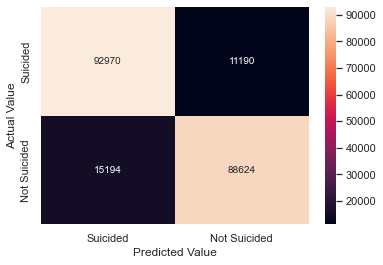

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

## 3.6 ComplementNB

In [ ]:
from sklearn.naive_bayes import ComplementNB
cmNB = ComplementNB()
cmNB.fit(X_train, y_train)
y_pred = cmNB.predict(X_test)
cmNB.score(X_test, y_test)

0.8731211955110637

Text(30.5, 0.5, 'Actual Value')

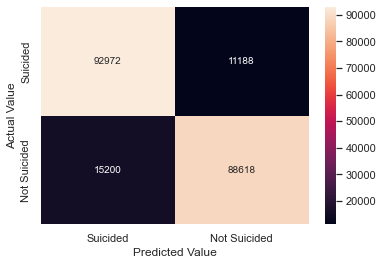

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
df=pd.DataFrame(cnf_matrix,index=["Suicided", "Not Suicided"],columns=["Suicided","Not Suicided"])
sns.heatmap(df,annot=True, fmt ='g')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

# Cross-validation

## We are not using K-fold cross-validation here for our case since our dataset is large enough.
## Moreover, theoratically we think K-cross validation can lower the variance to improve the generalization. But actually, the k-folded dataset that we got is not totally independent but has some relativity. How much variance that K-fold cross validation can lower has not been determined yet, it may bring up the bias.

Decision Tree Cross-Validation for hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

parameters = {'max_depth':[3,5,7,9],'min_samples_leaf':[1,2,3,4]}

clf = GridSearchCV(DecisionTreeClassifier(),parameters,cv=3,scoring=metrics.make_scorer(metrics.matthews_corrcoef),n_jobs=-1)
clf.fit(X_train,y_train)

print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))



Cross Validation Scores:  [0.93842656 0.93816606 0.93724246 0.93764505 0.93655568 0.93643727
 0.93799882 0.93719361 0.93795145 0.93904085]
Average CV Score:  0.9376657798151014
Number of CV Scores used in Average:  10


Logistic Regression cross-validation model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# parameter grid
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

clf = GridSearchCV(LogisticRegression(),parameters,cv=3,scoring=metrics.make_scorer(metrics.matthews_corrcoef),n_jobs=-1)
clf.fit(X_train,y_train)

print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))



C:\Users\hukai\anaconda3\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hukai\anaconda3\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Cross Validation Scores:  [0.95306209 0.95275423 0.95365415 0.95377256 0.95235163 0.95192535
 0.95398461 0.95230314 0.95488455 0.95557134]
Average CV Score:  0.9534263646654557
Number of CV Scores used in Average:  10


C:\Users\hukai\anaconda3\envs\gpu2\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC cross-validation model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

clf = GridSearchCV(SVC(),parameters,cv=3,scoring=metrics.make_scorer(metrics.matthews_corrcoef),n_jobs=-1)
clf.fit(X_train,y_train)

print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

clf = GridSearchCV(SVC(),parameters,cv=3,scoring=metrics.make_scorer(metrics.matthews_corrcoef),n_jobs=-1)
clf.fit(X_train,y_train)

print('Best Parameter: ', clf.best_params_)
print('CV Best Score: ', clf.best_score_)

#Get best model
best_model = clf.best_estimator_
print('Accuracy on test set: ', best_model.score(X_test,y_test))
y_pred = best_model.predict(X_test)
print('MCC on test set: ', metrics.matthews_corrcoef(y_test,y_pred))

hyperparameter tuning

In [ ]:
LogisticRegressionCV = LogisticRegression()
param_grid_mlp = {
    'penalty': ['l2','l1', 'elasticnet' ], 
    'solver' : ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga' ],
    'multi_class':['auto', 'ovr', 'multinomial'],
    'max_iter' : [100]
}

CV_mlp = GridSearchCV(estimator=LogisticRegressionCV, param_grid=param_grid_mlp, cv= 10,n_jobs=-1)
CV_mlp.fit(X_train, y_train)